In [1]:
import warnings
warnings.filterwarnings("ignore")
from dataclasses import dataclass

import datetime
import os

import random
from collections import defaultdict

import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import Pool, cv
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import KFold


%matplotlib inline
path_dir=os.getcwd()
path_train='../train_dataset_train.csv'
path_test='../test_dataset_test.csv'
path_subm='../Иннополис/sample_solution.csv'

COOOOLS=[0,4]
def get_df(path,train=True):
    df=pd.read_csv(path)
    df=df.sort_index(axis=1)
    df.drop(['id','.geo','area'],axis=1,inplace=True)
    if train:
        df=df.loc[df.crop.isin(COOOOLS)]
        y=df[['crop']]
        df.drop(['crop'],axis=1,inplace=True)  
    
    df.rename({c:pd.to_datetime(c.replace('nd_mean_','')) for c in df.columns},axis=1,inplace=True) 
    df[df<=0]=0    #0.971315
    return (df.reset_index(drop=True).values,y.crop.reset_index(drop=True).values) if train else df.reset_index(drop=True).values

In [2]:
def get_df_idx(path,train=True):
    df=pd.read_csv(path)
    df=df.sort_index(axis=1)
    df.drop(['id','.geo','area'],axis=1,inplace=True)
    if train:
        df=df.loc[df.crop.isin(COOOOLS)]
        y=df[['crop']]
        df.drop(['crop'],axis=1,inplace=True)  
    
    df.rename({c:pd.to_datetime(c.replace('nd_mean_','')) for c in df.columns},axis=1,inplace=True) 
    df[df<=0]=0    #0.971315
    return (df,y) if train else df
X_train_idx,y_train_idx=get_df_idx(path_train)

In [3]:
params_model={
    'loss_function':'Logloss',
    'random_seed':42,
    'eval_metric':'Recall',
    'bootstrap_type':'Bernoulli',#'Bayesian',#'Bernoulli',#'Poisson',
    'l2_leaf_reg': 3,
    'early_stopping_rounds':4,
    'iterations':50,         
     'verbose':False,
    'depth': 2,
    'learning_rate': 0.3,    
}

In [4]:
X_train,y_train=get_df(path_train)
N=5
kf=KFold(n_splits=N)
splits=kf.split(X=X_train,y=y_train)
result=dict()
for i,(train_index, valid_index) in enumerate(splits): 
    train_pool = Pool(X_train[train_index], y_train[train_index])
    validation_pool = Pool(X_train[valid_index], y_train[valid_index])
    cb = catboost.CatBoostClassifier(**params_model)
    cb.fit(train_pool);
    
    indices, scores = cb.get_object_importance(
        train_pool,
        validation_pool,        
        importance_values_sign='Positive'#,97.4 #Negative,All    
        #importance_values_sign='Negative',
    )
    result[i]={'indices':train_index[indices],'scores':scores}

In [5]:
valid_index.shape

(288,)

In [6]:
res_summ=defaultdict(lambda :0)
for _,val in result.items():
    for i in range(len(val['indices'])):
        res_summ[val['indices'][i]]+=val['scores'][i]

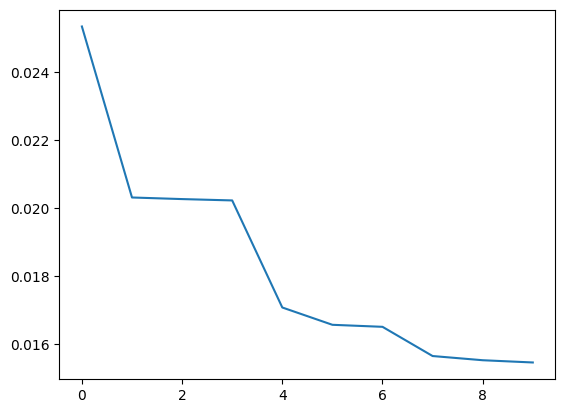

In [7]:
res=sorted(list(res_summ.items()),key=lambda x:x[1],reverse=True)
plt.plot([v for k,v in res[:10]])

In [8]:
dsadasda

NameError: name 'dsadasda' is not defined

In [12]:
res[:20][:13]

[(130, 0.02534233390997364),
 (167, 0.020317302327780565),
 (64, 0.020270402449887648),
 (6, 0.02023077747443601),
 (119, 0.017085030046004555),
 (181, 0.01657631922635107),
 (263, 0.016516910180674967),
 (235, 0.015658610762552195),
 (133, 0.015535249158452532),
 (113, 0.015469204710872646),
 (152, 0.015339611411791713),
 (253, 0.015024926895511227),
 (140, 0.014560513789508586)]

In [13]:
IDX_=[k for k,_ in res]

In [14]:
IDX_RRR=X_train_idx.iloc[IDX_].index
IDX_RRR[:5]

Int64Index([469, 583, 223, 19, 432], dtype='int64')

In [ ]:
for i,j in enumerate(X_train_idx.iloc[IDX_].index[:120]):
    print(j,end=',')
    if (i+1)%10==0:
        print()

In [ ]:
##################

In [ ]:
def get_df(path,train=True,drp=0):
    df=pd.read_csv(path)
    df=df.sort_index(axis=1)
    df.drop(['id','.geo','area'],axis=1,inplace=True)
    if train:
        df=df.loc[df.crop.isin([0,4])]
        df.reset_index(drop=True,inplace=True) 
        ##    
        #drop06
       # drp=list(set(drop06)
       # print(f'droped: {len(drp)}')
        df.drop(drp,axis=0,inplace=True)          
        y=df[['crop']]
        df.drop(['crop'],axis=1,inplace=True)  
    
   # df.rename({c:pd.to_datetime(c.replace('nd_mean_','')) for c in df.columns},axis=1,inplace=True) 
    df[df<=0]=0    
    return (df.reset_index(drop=True),y.crop.reset_index(drop=True).values) if train else df.reset_index(drop=True)

# X_train,y_train=get_df(path_train)
# X_test=get_df(path_test,False)
# df_subm=pd.read_csv(path_subm,index_col='id')

In [ ]:
from tqdm import tqdm
FOLDS=57

RES=[]
kfolds = KFold(n_splits=FOLDS)
for i in tqdm(range(len(IDX_RRR))):
    result={'recall':[],'cm':[]}
    X_train,y_train=get_df(path_train,True,X_train_idx.iloc[IDX_].index[:i])
    kfolds = KFold(n_splits=FOLDS)
    splits = kfolds.split(X_train,y_train)   
    for fld,(train_index, valid_index) in enumerate(splits): 
        

        X_tr, X_val = X_train.values[train_index], X_train.values[valid_index]
        y_tr, y_val = y_train[train_index], y_train[valid_index]    

        train_pool = Pool(X_tr,y_tr)
        validation_pool = Pool(X_val,y_val)
        cb = catboost.CatBoostClassifier(**params_model)
        cb.fit(train_pool);

        y_val_pred=cb.predict(X_val)

        recall=recall_score(y_true=y_val,y_pred=y_val_pred,average='macro')
        cm=confusion_matrix(y_true=y_val,y_pred=y_val_pred)
        result['recall'].append(recall)
        result['cm'].append(cm)
        
   # avg_res.append([sum(result['recall'])/FOLDS,np.round(sum(result['cm'])/FOLDS,0)])
   # print(i,sum(result['recall'])/FOLDS)
    
    RES.append([i,sum(result['recall'])/FOLDS,np.round(sum(result['cm'])/FOLDS,0)])

In [ ]:
sorted(RES,key=lambda x:x[1],reverse=True)